<a href="https://colab.research.google.com/github/amikoshimrah/Deployment/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import require libraries
import pymysql
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

try:
  con = pymysql.connect(
      host='127.0.0.1',
      user='root',
      password='Mysql@2025',
      port = 3306
  )
  #load data
  query ="select * from iris.iris"
  df = pd.read_sql(query,con)
  print('Connected Successfully')
  display(df.head())
except pymysql.error as e:
  print(f'Sql error: {e}')
finally:
  if 'con' in locals():
      con.close()
      print('Connection Closed Successfully')


Connected Successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Connection Closed Successfully


In [ ]:
# getting total number of rows and column in the dataframe
print(f' Shape of the dataframe = {df.shape}')
print(f' Total number of rows in the dataset =  {df.shape[0]}')
print(f' Total number of columns in the dataset =  {df.shape[1]}')
print(f' The missing value of NaNs are : {df.isna().sum().sum() }')  #checking missing value NaN
print(f' The Number of duplicate records are : {df.duplicated().sum()}')  # Checcking if there is any duplicate record

 Shape of the dataframe = (150, 6)
 Total number of rows in the dataset =  150
 Total number of columns in the dataset =  6
 The missing value of NaNs are : 0
 The Number of duplicate records are : 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#import libraries for ML
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics

In [ ]:
df=df.drop(columns=['Id'])

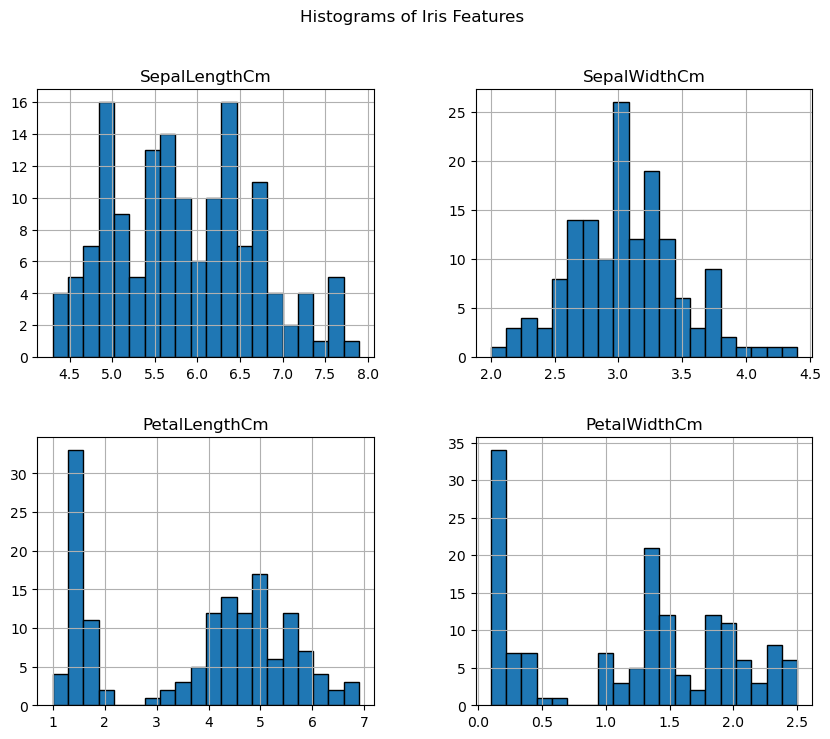

In [ ]:
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Iris Features")
plt.show()

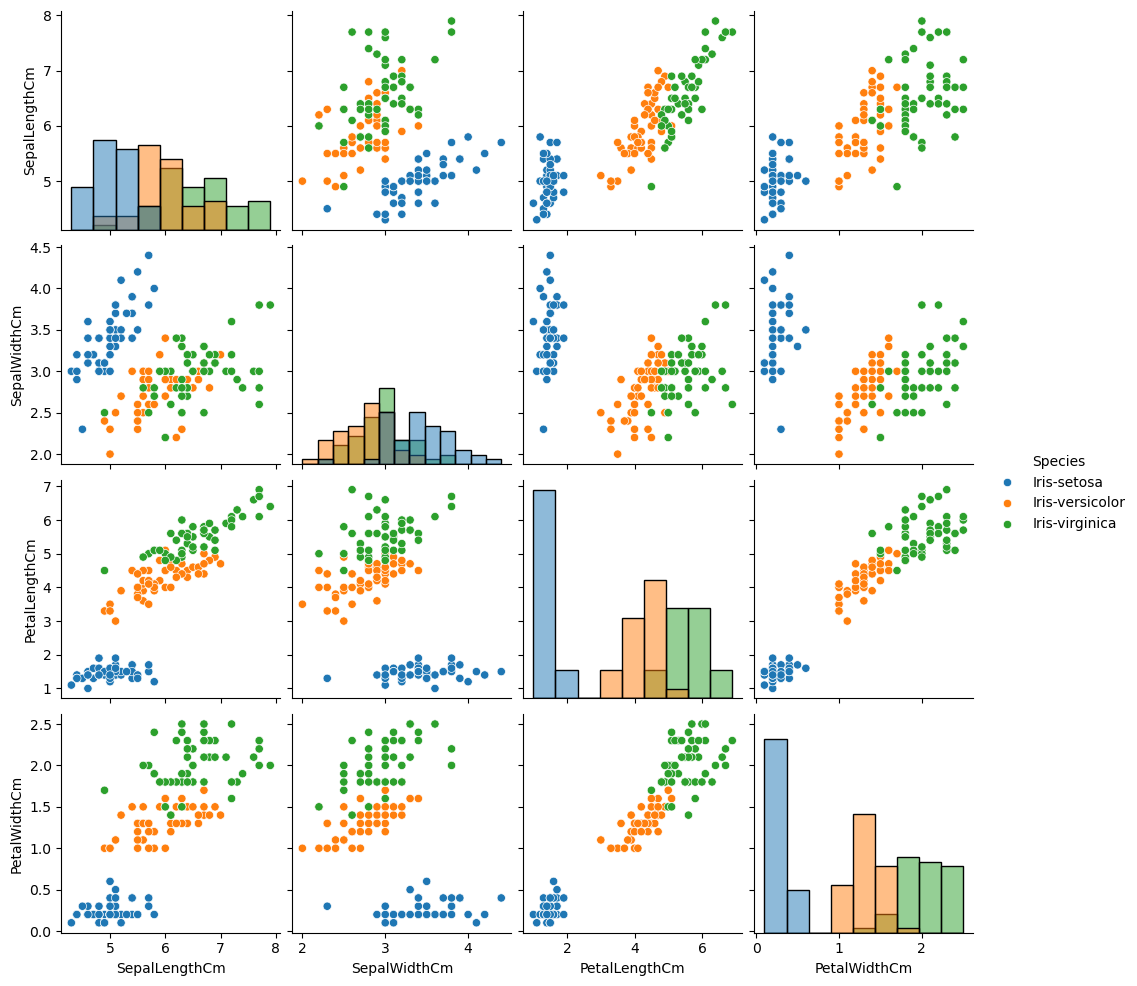

In [ ]:
sns.pairplot(data=df, hue='Species', diag_kind='hist')
plt.show()

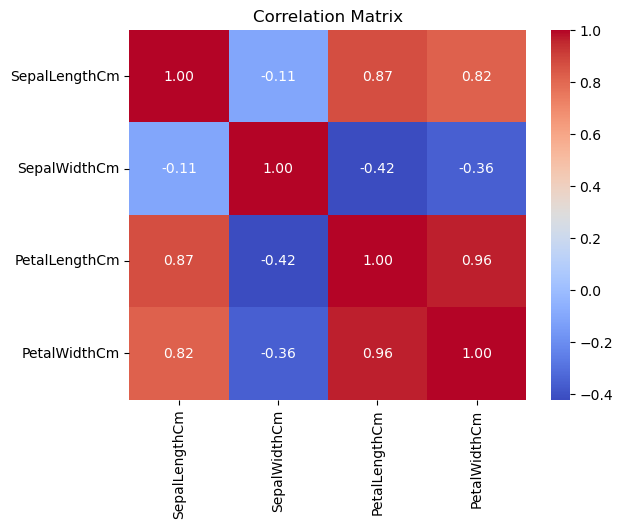

In [ ]:
corr = df.iloc[:, :-1].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

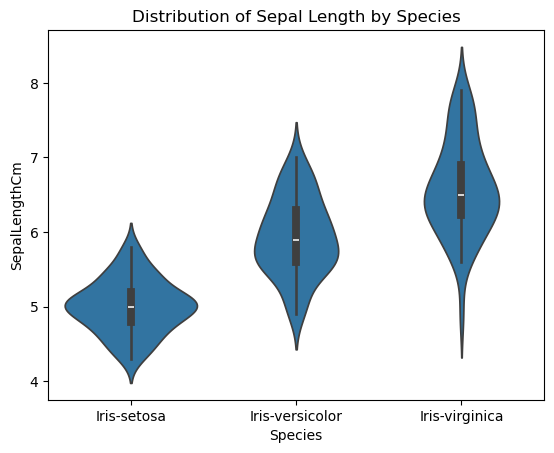

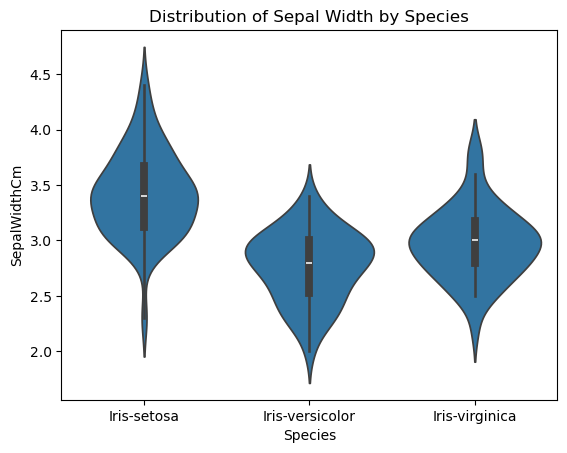

In [ ]:
sns.violinplot(x='Species', y='SepalLengthCm', data=df)
plt.title("Distribution of Sepal Length by Species")
plt.show()

sns.violinplot(x='Species', y='SepalWidthCm', data=df)
plt.title("Distribution of Sepal Width by Species")
plt.show()

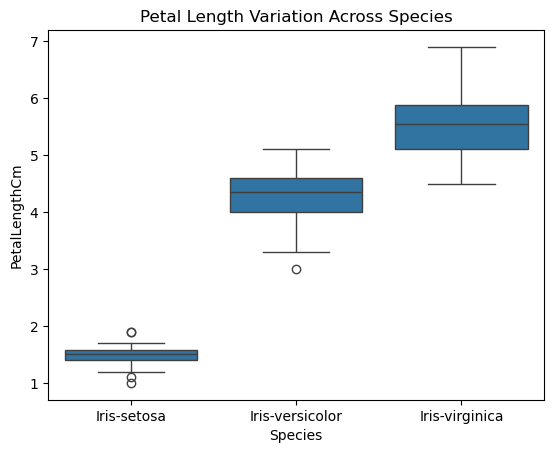

In [ ]:
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title("Petal Length Variation Across Species")
plt.show()

In [ ]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
print(df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]


In [ ]:
X=df.drop(columns=['Species'])
y =df['Species']

In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
# Model Training
model = CatBoostClassifier(iterations = 1000, verbose = 1)
# Fitting the model
model.fit(X_train, y_train)

Learning rate set to 0.071017
0:	learn: 1.0144505	total: 135ms	remaining: 2m 14s
1:	learn: 0.9426321	total: 136ms	remaining: 1m 8s
2:	learn: 0.8791473	total: 138ms	remaining: 45.8s
3:	learn: 0.8214933	total: 140ms	remaining: 34.8s
4:	learn: 0.7788401	total: 141ms	remaining: 28s
5:	learn: 0.7280627	total: 142ms	remaining: 23.5s
6:	learn: 0.6913500	total: 143ms	remaining: 20.3s
7:	learn: 0.6584766	total: 145ms	remaining: 17.9s
8:	learn: 0.6235636	total: 146ms	remaining: 16s
9:	learn: 0.5948198	total: 147ms	remaining: 14.6s
10:	learn: 0.5645192	total: 148ms	remaining: 13.3s
11:	learn: 0.5372072	total: 150ms	remaining: 12.3s
12:	learn: 0.5124436	total: 151ms	remaining: 11.5s
13:	learn: 0.4845248	total: 152ms	remaining: 10.7s
14:	learn: 0.4639622	total: 153ms	remaining: 10s
15:	learn: 0.4432597	total: 155ms	remaining: 9.51s
16:	learn: 0.4251080	total: 156ms	remaining: 9.02s
17:	learn: 0.4095535	total: 157ms	remaining: 8.58s
18:	learn: 0.3929013	total: 159ms	remaining: 8.19s
19:	learn: 0.377

In [ ]:
# predictions from the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Model Evaluation
print('Training Accuracy  :', np.round(metrics.accuracy_score(y_train, y_train_pred), 3))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred, average='macro'), 3))
print('Training Recall    :', np.round(metrics.recall_score(y_train, y_train_pred, average='macro'), 3))
print('Training F1 Score  :', np.round(metrics.f1_score(y_train, y_train_pred, average='macro'), 3))


print('Training Accuracy  :', np.round(metrics.accuracy_score(y_test, y_test_pred), 3))
print('Training Precision :', np.round(metrics.precision_score(y_test, y_test_pred, average='macro'), 3))
print('Training Recall    :', np.round(metrics.recall_score(y_test, y_test_pred, average='macro'), 3))
print('Training F1 Score  :', np.round(metrics.f1_score(y_test, y_test_pred, average='macro'), 3))

Training Accuracy  : 1.0
Training Precision : 1.0
Training Recall    : 1.0
Training F1 Score  : 1.0
Training Accuracy  : 1.0
Training Precision : 1.0
Training Recall    : 1.0
Training F1 Score  : 1.0


In [ ]:

# Model Training
model2 = XGBClassifier()
# Fitting the model
model2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# predictions from the model
y_train_pred_XB = model2.predict(X_train)
y_test_pred_XB = model2.predict(X_test)

In [ ]:
# Model Evaluation
print('Training Accuracy  :', np.round(metrics.accuracy_score(y_train, y_train_pred_XB), 3))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred_XB, average='macro'), 3))
print('Training Recall    :', np.round(metrics.recall_score(y_train, y_train_pred_XB, average='macro'), 3))
print('Training F1 Score  :', np.round(metrics.f1_score(y_train, y_train_pred_XB, average='macro'), 3))

print('Training Accuracy  :', np.round(metrics.accuracy_score(y_test, y_test_pred_XB), 3))
print('Training Precision :', np.round(metrics.precision_score(y_test, y_test_pred_XB, average='macro'), 3))
print('Training Recall    :', np.round(metrics.recall_score(y_test, y_test_pred_XB, average='macro'), 3))
print('Training F1 Score  :', np.round(metrics.f1_score(y_test, y_test_pred_XB, average='macro'), 3))

Training Accuracy  : 1.0
Training Precision : 1.0
Training Recall    : 1.0
Training F1 Score  : 1.0
Training Accuracy  : 1.0
Training Precision : 1.0
Training Recall    : 1.0
Training F1 Score  : 1.0


In [ ]:
# Creating a model
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.001)

# Fitting the model
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.001, n_estimators=100)

In [ ]:
# Taking predictions from the model on training and testing data
y_train_pred_ada = ada.predict(X_train)
y_test_pred_ada = ada.predict(X_test)

In [ ]:
# Model Evaluation
print('Training Accuracy  :', np.round(metrics.accuracy_score(y_train, y_train_pred_ada), 3))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred_ada, average='macro'), 3))
print('Training Recall    :', np.round(metrics.recall_score(y_train, y_train_pred_ada, average='macro'), 3))
print('Training F1 Score  :', np.round(metrics.f1_score(y_train, y_train_pred_ada, average='macro'), 3))

print('Training Accuracy  :', np.round(metrics.accuracy_score(y_test, y_test_pred_ada), 3))
print('Training Precision :', np.round(metrics.precision_score(y_test, y_test_pred_ada, average='macro'), 3))
print('Training Recall    :', np.round(metrics.recall_score(y_test, y_test_pred_ada, average='macro'), 3))
print('Training F1 Score  :', np.round(metrics.f1_score(y_test, y_test_pred_ada, average='macro'), 3))

Training Accuracy  : 0.95
Training Precision : 0.953
Training Recall    : 0.949
Training F1 Score  : 0.95
Training Accuracy  : 1.0
Training Precision : 1.0
Training Recall    : 1.0
Training F1 Score  : 1.0


In [ ]:
import pickle as pkl
with open('iris_classifier_pipeline.pkl','wb') as file:
    pkl.dump(ada, file)
print('Model save as iris_classifier_pipeline.pkl')

Model save as iris_classifier_pipeline.pkl
